## Criminality Across Vancouver Neighbourhoods

By: Isabela Lucas Bruxellas, Sam Thorne, Sean Meng

### Introduction

#### Background Information

Despite nation-wide crime rates declining since the 1990s in Canada (STATCAN 2021), many Canadians still fear crime, especially in their local communities (JUSTICE CANADA, 2022). Current research further suggests that effective crime control strategies embrace the importance of regular citizens in preventing crime and enhance their ability to do so (USCIDA et al., 2014). This research focuses on empowering citizens by providing understanding of overall and crime specific proportions across the communities of Vancouver.



#### Research Question

Is there a difference between the proportions of crimes in Vancouver across different neighbourhoods? 

To answer this question, we will explore the proportion of crimes grouped per year and across all of the neighbourhoods of the city of Vancouver. Our goal is to explore this data from a historical perspective, comparing trends across the years 2011 to 2021. We also intend to analyze trends for the different crime types to explore whether there are significant pattern changes.

Mean number of crimes from 2011 to 2021 comparing each of the districts of Vancouver

#### The Dataset

The dataset used in the analysis is provided by the Vancouver Police Department (VDC) and was collected from the PRIME BC Police Records Management System (RMS). This data reflects all police-reported crimes during the period. The dataset includes information on the type of crime (as aggregations of subset types), time (year, month, day, hour, and minute), and location (general block area and neighbourhood).

### Preliminary Results

In [46]:
set.seed(101)

library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(RColorBrewer)

#### Data import and cleaning

In [68]:
What is the most consistently safe neighbourhood in vancouver
# Reading in data from a downloaded csv file.
crimedata <- read_csv('crimedata_csv_AllNeighbourhoods_AllYears.csv')
head(crimedata) 

########
# DO WE NEED TO READ THIS DIRECTLY FROM THE WEB INSTEAD OF DOWNLOADING???

Rows: 841759 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


In [101]:
# We decided to drop the columns of type, minute, month, day, hour, hundred_block, X and Y to answer our question
# we want to see the number of times the neighbourhood appears each year as a proportion of crime that year.
crimedata <- crimedata %>%
    select('YEAR', 'NEIGHBOURHOOD') %>%
    filter(!is.na(NEIGHBOURHOOD)) %>%
    filter(!is.na(YEAR)) # drop NA values in the neighbourhood column and in the year column. 

central = c('Central Business District', 'Stanley Park', 'West End')
west = c('Fairview', 'Marpole', 'Kitsilano', 'West Point Grey', 'Dunbar-Southlands', 
         'Kerrisdale', 'Shaughnessy', 'Musqueam', 'Arbutus Ridge', 'South Cambie', 'Oakridge')
east = c('Grandview-Woodland', 'Mount Pleasant', 'Renfrew-Collingwood', 'Kensington-Cedar Cottage',
         'Riley Park', 'Strathcona', 'Sunset', 'Hastings-Sunrise', 'Killarney', 'Victoria-Fraserview')

crimedata <- crimedata %>%
    mutate(DISTRICT = case_when(
        NEIGHBOURHOOD == 'Central Business District' | NEIGHBOURHOOD == 'Stanley Park' | NEIGHBOURHOOD == 'West End' ~ 'Central',
        NEIGHBOURHOOD == 'Fairview' | NEIGHBOURHOOD == 'Marpole' | NEIGHBOURHOOD == 'Kitsilano'| NEIGHBOURHOOD =='West Point Grey'|
        NEIGHBOURHOOD == 'Dunbar-Southlands'| NEIGHBOURHOOD == 'Kerrisdale' | NEIGHBOURHOOD == 'Shaughnessy'| NEIGHBOURHOOD == 'Musqueam'|
        NEIGHBOURHOOD == 'Arbutus Ridge'| NEIGHBOURHOOD == 'South Cambie' | NEIGHBOURHOOD == 'Oakridge' ~ 'West',
        NEIGHBOURHOOD == 'Grandview-Woodland'| NEIGHBOURHOOD == 'Mount Pleasant'| NEIGHBOURHOOD == 'Renfrew-Collingwood'| 
        NEIGHBOURHOOD == 'Kensington-Cedar Cottage'| NEIGHBOURHOOD == 'Riley Park'| NEIGHBOURHOOD == 'Strathcona'| NEIGHBOURHOOD == 'Sunset'|
        NEIGHBOURHOOD == 'Hastings-Sunrise'| NEIGHBOURHOOD == 'Killarney'|NEIGHBOURHOOD == 'Victoria-Fraserview' ~ 'East'))
    # filter(is.na(DISTRICT))

# We also want a column that holds the value for the number of times each neighbourhood appears in the data
crimedata <- crimedata %>%
    group_by(YEAR) %>%
    mutate(NUM_CRIMES_YEAR = n()) 
head(crimedata)

YEAR,NEIGHBOURHOOD,DISTRICT,NUM_CRIMES_YEAR
<dbl>,<chr>,<chr>,<int>
2012,Oakridge,West,35555
2019,Fairview,West,48251
2019,West End,Central,48251
2021,West End,Central,32141
2014,West End,Central,39267
2020,West End,Central,37498


#### Data Plots

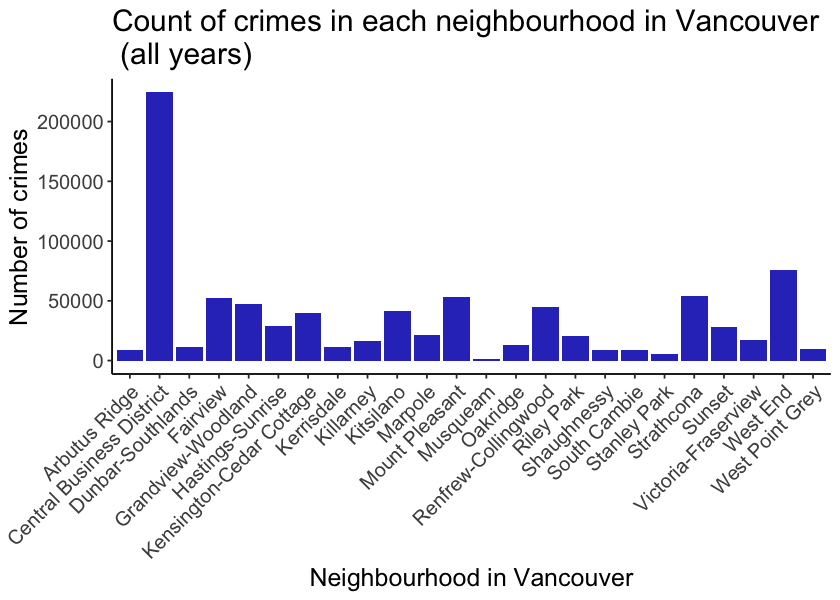

In [77]:
# Visualization of the number of crimes in each neighbourhood
options(repr.plot.height = 5, repr.plot.width = 7)

neighbourhood_crime_vis <- selected_crimedata %>%
    ggplot(aes(x = NEIGHBOURHOOD)) +
    geom_bar(fill = '#333AC3') + 
    theme_classic()+
    theme(text = element_text(size = 15),
          axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = 'Count of crimes in each neighbourhood in Vancouver \n (all years)',
         x = 'Neighbourhood in Vancouver',
         y = 'Number of crimes') 
    
neighbourhood_crime_vis

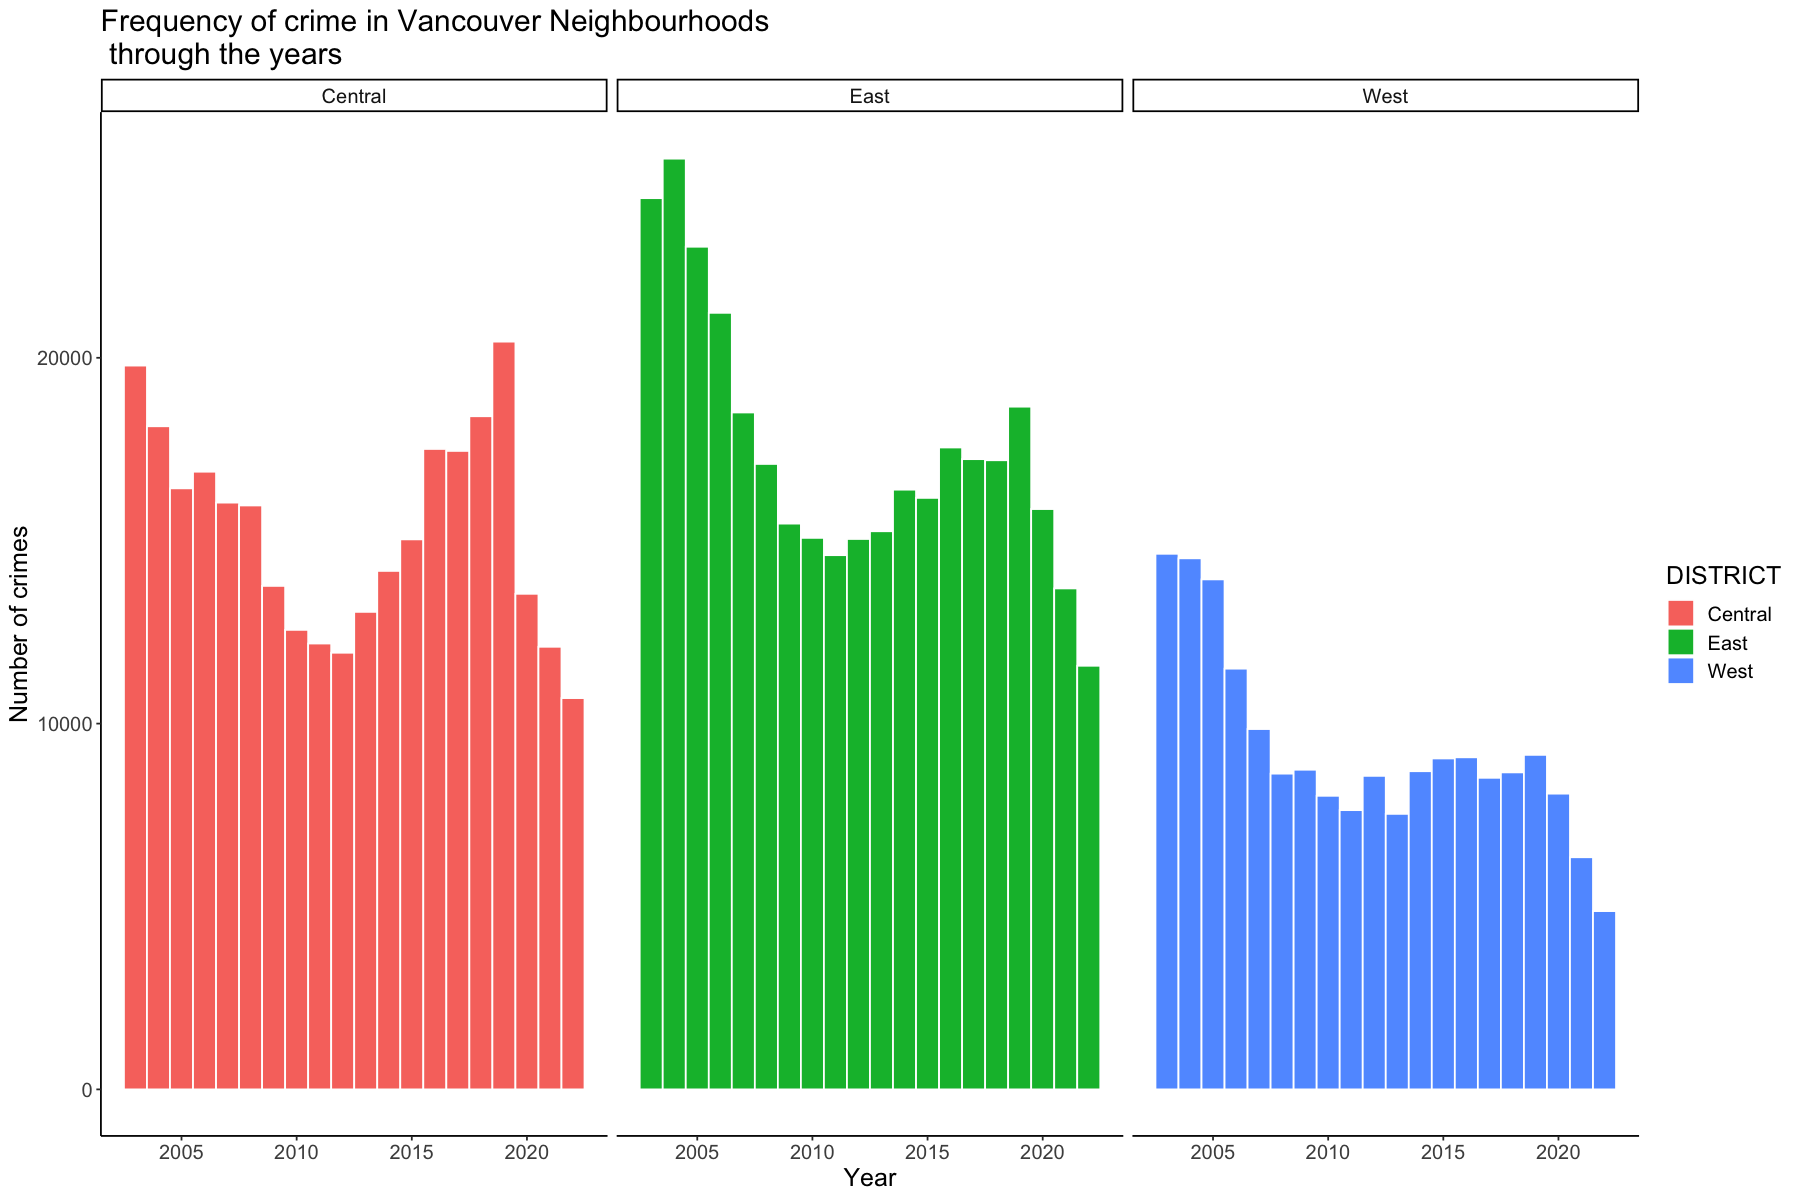

In [111]:
# Another visualization that we are going to use is a line graph representing how to proportion of crime
# in each of the neighbourhoods has changed through the year. 

options(repr.plot.width = 15, repr.plot.height = 10)
# colorblind palette, different color for each neighbourhood.
palette(c("#E5F5F9" ,"#1D91C0", "#67001F", "#F7FCFD" ,"#CB181D", "#78C679", "#F46D43", "#A6CEE3" ,"#FD8D3C", "#A6D854","#D4B9DA", 
        "#6A51A3", "#7F0000", "#D9D9D9", "#FFF7BC", "#000000", "#F0F0F0", "#C7EAE5", "#003C30" ,"#F16913",
        "#FFF7FB", "#8C6BB1", "#C7E9B4", "#762A83", "#FC9272", "#AE017E" ,"#F7F7F7", "#DF65B0", "#EF3B2C", "#74C476"))

years_vis <- crimedata %>%
    group_by(DISTRICT) %>%
    # ggplot(aes(x = YEAR, fill = NEIGHBOURHOOD, color = NEIGHBOURHOOD)) +
    ggplot(aes(x = YEAR, fill = DISTRICT))+
    geom_histogram(binwidth = 1, color = 'white')+
    # geom_histogram(binwidth = 1, color = 'white', position = 'identity', alpha = 0.2)+
    # geom_freqpoly(binwidth = 1) +
    theme_classic() +
    theme(legend.position="right", 
          text = element_text(size = 15)) +
    labs(title = "Frequency of crime in Vancouver Neighbourhoods \n through the years",
         x = "Year",
         y = "Number of crimes")+
         # legend = "Neighbourhood in Vancouver") +
    facet_wrap(~DISTRICT, ncol = 3)
    # scale_fill_brewer(palette = 'Paired')
years_vis

# central_vis <- crimedata %>%
#     filter(DISTRICT == 'Central') %>%
#     ggplot(aes(x = YEAR, fill = NEIGHBOURHOOD)) +
#     geom_histogram(binwidth = 1, color = 'white') +
#     labs(title = 'Crimes in Central Vancouver Neighbourhoods through the years',
#          x = 'Year',
#          y = 'Number of crimes') +
#     theme_classic() +
#     theme(text = element_text(size = 13)) 
# central_vis


#### Estimates

one average which district has the most crime per year.

### Ask the TA if we should take a mean of the 

In [ ]:
# We are looking for the proportion of crime in each neighbourhood

### Methods

### References


https://www150.statcan.gc.ca/n1/pub/85-002-x/2022001/article/00013-eng.htm

https://www.justice.gc.ca/eng/rp-pr/csj-sjc/crime/rr01_1/p0.html

https://www.ojp.gov/pdffiles1/nij/grants/245408.pdf

https://www.statista.com/statistics/251934/usa--percentage-of-violent-crimes-reported-to-the-police/#:~:text=In%202021%2C%20about%2045.6%20percent,to%20police%2C%20at%2060.5%20percent.

https://www.csustan.edu/sites/default/files/groups/University%20Honors%20Program/Journals_two/solorzano_yesenia_.pdf